# Drawing Functions in OpenCV

## Goal

* Learn to draw different geometric shapes with OpenCV
* You will learn these functions : 
    * cv2.line()
    * cv2.circle() 
    * cv2.rectangle()
    * cv2.ellipse()
    * cv2.putText()

## Code
In all the above functions, you will see some common arguments as given below:

* img : The image where you want to draw the shapes
* color : Color of the shape. for BGR, pass it as a tuple, eg: `(255,0,0)` for blue. For grayscale, just pass the scalar value.
* thickness : Thickness of the line or circle etc. If -1 is passed for closed figures like circles, it will fill the shape. *default thickness = 1*
* lineType : Type of line, whether 8-connected, anti-aliased line etc. By default, it is 8-connected. `cv2.LINE_AA` gives anti-aliased line which looks great for curves.
    

## Drawing Line

To draw a line, you need to pass **starting and ending coordinates** of line. We will create a black image and draw a blue line on it from top-left to bottom-right corners.


In [1]:
import numpy as np
import cv2

# Create a black image
img = np.zeros((512,512,3), np.uint8)

# Draw a diagonal blue line with thickness of 5 px
img = cv2.line(img,(128,0),(128,511),(0,0,255),5)#변경할 일이 없기 때문에 튜플로 저장하게 됨.


In [2]:
from matplotlib import pyplot as plt

# b,g,r = cv2.split(img)
# img2 = cv2.merge([r,g,b])
img2 = img[:,:,::-1] # faster version.

cv2.imshow('img', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
print(img.shape)

(512, 512, 3)


# Drawing Rectangle

* To draw a rectangle, you need **top-left corner and bottom-right corner of rectangle**. 
* This time we will draw a **green rectangle** at the top-right corner of image.

In [4]:
img = cv2.rectangle(img,(0,512),(128,384),(0,255,0),-1)#-1은 채우기 왼쪽 하단에 사각형 만드는 코드

In [5]:
from matplotlib import pyplot as plt

# b,g,r = cv2.split(img)
# img2 = cv2.merge([r,g,b])
img2 = img[:,:,::-1] # faster version.
cv2.imshow('img', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Drawing Circle

* To draw a circle, you need **its center coordinates and radius**. 
* We will draw a circle inside the rectangle drawn above.

In [6]:
img = cv2.circle(img,(447,63), 63, (255,0,0), -1)

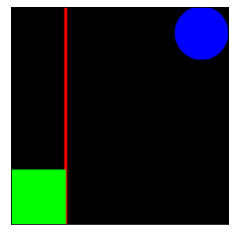

In [7]:
from matplotlib import pyplot as plt

# b,g,r = cv2.split(img)
# img2 = cv2.merge([r,g,b])
img2 = img[:,:,::-1] # faster version.
plt.imshow(img2,cmap='gray', interpolation='bicubic')
plt.xticks([]); plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

# Drawing Ellipse

To draw the ellipse, we need to pass several arguments. 

* One argument is the center location `(x,y)`. 
* Next argument is axes lengths `(major axis length, minor axis length)`.
* `angle` is the angle of rotation of ellipse in **anti-clockwise direction**. 
* `startAngle` and `endAngle` denotes the starting and ending of ellipse arc measured in clockwise direction from major axis. i.e. giving values 0 and 360 gives the full ellipse. 
* For more details, check the documentation of `cv2.ellipse()`. 

Below example draws a half ellipse at the center of the image.

In [8]:
img = np.zeros((512,512,3), np.uint8)
img = cv2.ellipse(img,(256,256),(100,50),0,45,180,255,-1)

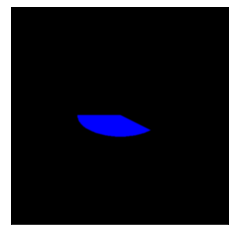

In [9]:
from matplotlib import pyplot as plt

# b,g,r = cv2.split(img)
# img2 = cv2.merge([r,g,b])
img2 = img[:,:,::-1] # faster version.
plt.imshow(img2,cmap='gray', interpolation='bicubic')
plt.xticks([]); plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

# Drawing Polygon

To draw a polygon, 
* first you need coordinates of vertices. 
* Make those points into an array of shape `ROWSx1x2` where ROWS are number of vertices and it should be of type int32. 
* Here we draw a small polygon of with **four vertices** in yellow color.

In [10]:
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
print(pts.shape)
pts = pts.reshape((-1,1,2))
print(pts)
print(pts.shape)
img = cv2.polylines(img,[pts],True,(0,255,255))

(4, 2)
[[[10  5]]

 [[20 30]]

 [[70 20]]

 [[50 10]]]
(4, 1, 2)


In [19]:
polyline?

Object `polyline` not found.


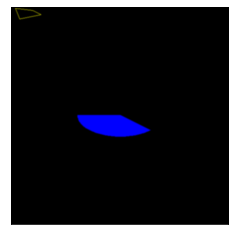

In [11]:
from matplotlib import pyplot as plt

# b,g,r = cv2.split(img)
# img2 = cv2.merge([r,g,b])
img2 = img[:,:,::-1] # faster version.
plt.imshow(img2,cmap='gray', interpolation='bicubic')
plt.xticks([]); plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

> **Note**
> If third argument is `False`, you will get a polylines joining all the points, **not a closed shape**.

In [12]:
img = np.zeros((512,512,3), np.uint8)
img = cv2.polylines(img,[pts],False,(0,255,255))

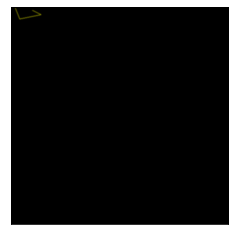

In [13]:
from matplotlib import pyplot as plt

# b,g,r = cv2.split(img)
# img2 = cv2.merge([r,g,b])
img2 = img[:,:,::-1] # faster version.
plt.imshow(img2,cmap='gray', interpolation='bicubic')
plt.xticks([]); plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

> # Note
>
> `cv2.polylines()` can be used to draw multiple lines. Just create a list of all the lines you want to draw and pass it to the function. All lines will be drawn individually. It is more better and faster way to draw a group of lines than calling `cv2.line()` for each line.

## Adding Text to Images:

To put texts in images, you need specify following things.

* Text data that you want to write
* Position coordinates of where you want put it (i.e. bottom-left corner where data starts).
* Font type (Check cv2.putText() docs for supported fonts)
* Font Scale (specifies the size of font)
* regular things like color, thickness, lineType etc. For better look, lineType = cv2.LINE_AA is recommended.

We will write OpenCV on our image in white color.

In [31]:
font = cv2.FONT_HERSHEY_SIMPLEX
img = np.zeros((512,512,3), np.uint8)
img = cv2.putText(img,'100',(10,500), font, 2,(255,255,255),5,cv2.LINE_AA)

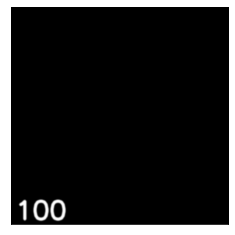

In [30]:
from matplotlib import pyplot as plt

# b,g,r = cv2.split(img)
# img2 = cv2.merge([r,g,b])
img2 = img[:,:,::-1] # faster version.
plt.imshow(img2,cmap='gray', interpolation='bicubic')
plt.xticks([]); plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

## Result

So it is time to see the final result of our drawing. As you studied in previous articles, display the image to see it.

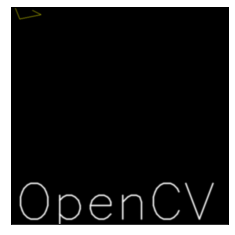

In [16]:
from matplotlib import pyplot as plt

# b,g,r = cv2.split(img)
# img2 = cv2.merge([r,g,b])
img2 = img[:,:,::-1] # faster version.
plt.imshow(img2,cmap='gray', interpolation='bicubic')
plt.xticks([]); plt.yticks([]) # to hide tick values on X and Y axis

plt.show()

## Additional Resources

The angles used in ellipse function is not our circular angles.

* Starting angle and ending angle are measured in arc-angles from an ellipse, not from a circle. 
* The phenomen is visualized in paragraph (59) of http://mathworld.wolfram.com/Ellipse.html . 

visit this discussion : (https://answers.opencv.org/question/14541/angles-in-ellipse-function/)